In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
random_distribution = stats.norm.rvs(size=10_000)

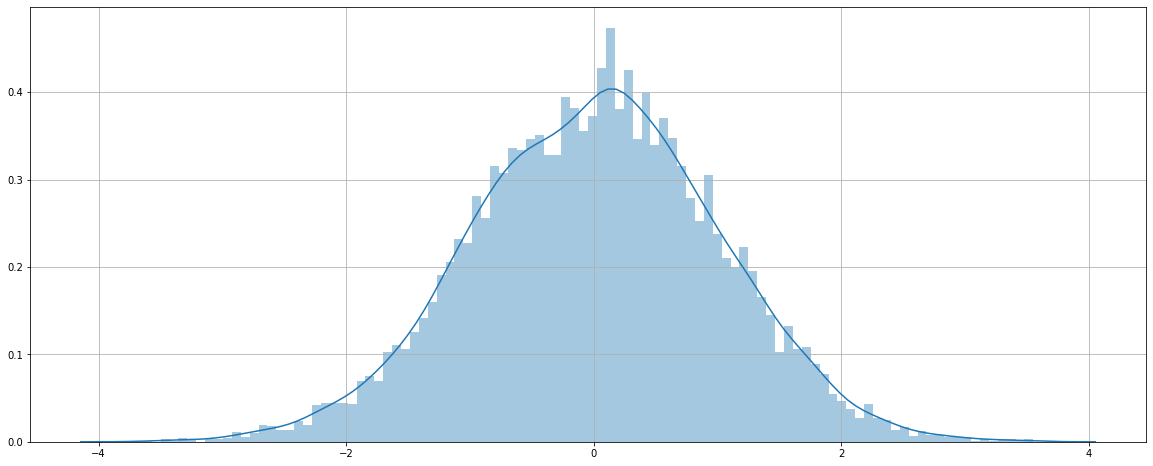

In [0]:
figure = plt.figure(figsize=(20, 8))

sns.distplot(random_distribution, bins=100)

plt.grid()

In [0]:
print(f"E(X) = {stats.norm.expect()}")

E(X) = 0.0


In [0]:
def expected_value_estimator(rvs):
    return np.sum(rvs) / rvs.shape[0]

In [0]:
def variance_estimator(rvs):
    return np.sum(np.power(rvs - expected_value_estimator(rvs), 2)) / rvs.shape[0]

In [0]:
def biased_variance_estimator(rvs):
    n = rvs.shape[0]
    return (1/n-1) * np.sum(np.power(rvs - expected_value_estimator(rvs), 2))

In [0]:
def eval_estimator(estimator, distibution, n_trials):
    estimates = np.zeros(n_trials)

    for i in tqdm(range(n_trials)):
      rvs = distibution.rvs(size=10_000)
      estimates[i] = expected_value_estimator(rvs)

    return estimates, distibution.expect()

In [0]:
expected_value_estimator(random_distribution)

0.014870600652193536

In [0]:
estimates, real_value = eval_estimator(expected_value_estimator, stats.norm, 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1689.00it/s]


In [0]:
n_trials = 1000
print(f"L2(X, Y) = {mean_squared_error(estimates, np.zeros(n_trials))}")

L2(X, Y) = 9.986572299393513e-05


In [0]:
estimates, _ = eval_estimator(variance_estimator, stats.norm, 1000)
truth = stats.norm.var()

100%|██████████| 1000/1000 [00:00<00:00, 1716.32it/s]


In [0]:
print(f"L2(X, Y) = {mean_squared_error(estimates, np.repeat(truth, n_trials))}")

L2(X, Y) = 0.9992435013538554


In [0]:
estimates, _ = eval_estimator(biased_variance_estimator, stats.norm, 1000)
truth = stats.norm.var()

100%|██████████| 1000/1000 [00:00<00:00, 1720.01it/s]


In [0]:
print(f"L2(X, Y) = {mean_squared_error(estimates, np.repeat(truth, n_trials))}")

L2(X, Y) = 1.0002028675601011


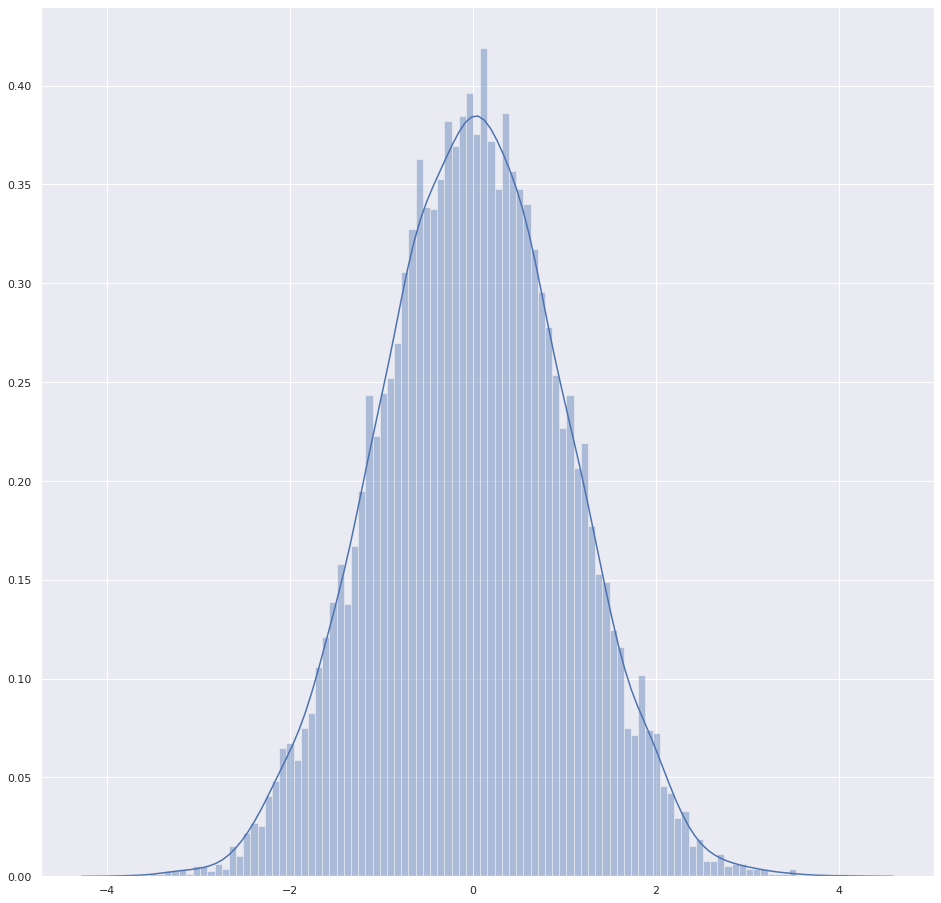

In [9]:
plt.figure(figsize=[16, 16])

X1 = stats.norm.rvs(size=10_000)
sns.distplot(X1, bins=100)

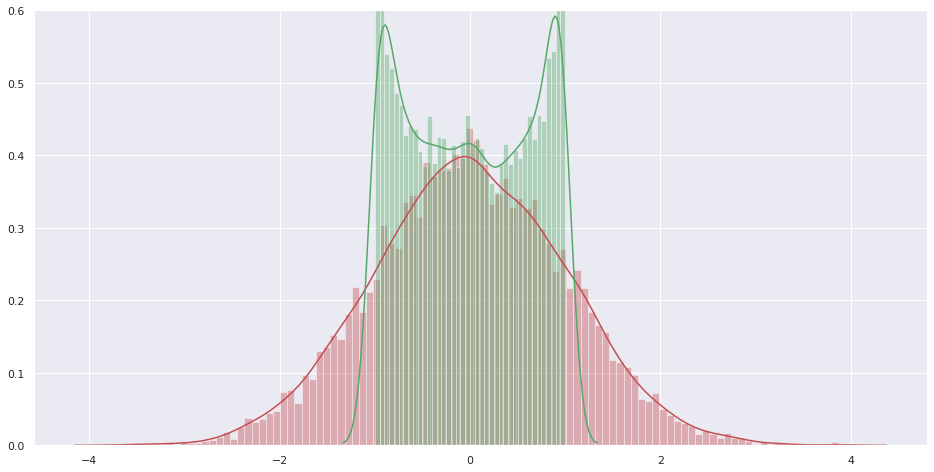

In [21]:
plt.figure(figsize=[16, 8])

X1 = stats.norm.rvs(size=10_000)

sns.distplot(X1, bins=100, color="r")
sns.distplot(np.sin(X1), bins=40, color="g")
plt.ylim([0, 0.6])
plt.savefig("sine_dist.png")